## Q2
Github repository: ACST890
<br>Name: milesh-b
<br>Files name: Question 2.ipynb



### a)
    We first need to load the data. I am using a dataframe to do this.
    The code is as shown below:

In [1]:
# import pandas package
import pandas as pd
df={  'B':[80,60,50],
      'C':[150,100,100],
      'D':[135,100,80],
      'E':[165,120,100],
      'F':[95,70,60],
      'G':[130,90,80],
      'H':[110,80,70]}

#convert to data frame
data = pd.DataFrame(df, columns=['B','C','D','E','F','G','H'],index=['Output, Q','Labour, L','Capital, K'])
data

,B,C,D,E,F,G,H
"Output, Q",80,150,135,165,95,130,110
"Labour, L",60,100,100,120,70,90,80
"Capital, K",50,100,80,100,60,80,70


Once the data is loaded we can now calculate the mean,variance, standard deviation and median. To make it easier to view, I have arranged it in a table. The code is as shown below:

In [2]:
#To calculate the mean
mean=data.mean(axis=1)
#To calculate the Variance
var=data.var(axis=1)
#To calculate the SD
SD=data.std(axis=1)
#To Calculate the median
median=data.median(axis=1)
#save the statistical inferences
stat=pd.concat([mean,var,SD,median],axis=1)
stat.columns=['Mean','Var','SD',"Median"]
stat

,Mean,Var,SD,Median
"Output, Q",123.571429,914.285714,30.237158,130.0
"Labour, L",88.571429,414.285714,20.354010,90.0
"Capital, K",77.142857,357.142857,18.898224,80.0


### b)

Ploting a histogram we can use the code shown below utilizing the matplotlib library:

In [3]:
# Ploting Histogram for Output, Q
import matplotlib.pyplot as plt
data.loc["Output, Q",].hist(alpha=1,bins="auto")
plt.title('Histogram for Output, Q')
plt.xlabel("Value")
plt.ylabel("Freq")

Text(0, 0.5, 'Freq')

Text(0, 0.5, 'Freq')

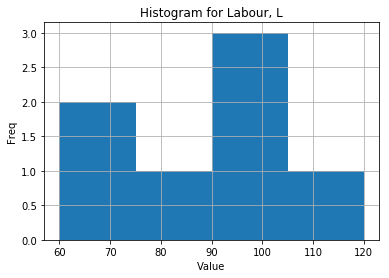

In [4]:
# Ploting Histogram for Labour, L
data.loc["Labour, L",].hist(alpha=1,bins="auto")
plt.title('Histogram for Labour, L')
plt.xlabel("Value")
plt.ylabel("Freq")

### c)
A Cobb -Douglas production function takes the form $Q=AL^\alpha K^\beta$. Taking the log on both sides we have $logQ=logA+\alpha logL+ \beta logK$. Therefore we need to calculate $logQ$,$logL$ and $logK$ which can be achived using the numpy library as shown in the code below:

In [5]:
#Finding the Log values we first need to import the numpy library
import numpy as np
# log values for Output, Q
log_Q=np.log(data.loc["Output, Q"])
# log values for Labour, L
log_L=np.log(data.loc["Labour, L"])
# log values for Capital, K
log_K=np.log(data.loc["Capital, K"])
#save the log values as log_val
log_val=pd.concat([log_Q,log_K,log_L],axis=1)
log_val.columns=['Output','Labour','Capital']
log_val

,Output,Labour,Capital
B,4.382027,3.912023,4.094345
C,5.010635,4.605170,4.605170
D,4.905275,4.382027,4.605170
E,5.105945,4.605170,4.787492
F,4.553877,4.094345,4.248495
G,4.867534,4.382027,4.499810
H,4.700480,4.248495,4.382027


### d)
A multiple regression model takes the form $\hat{Y_i}=\beta_0+\beta_1 X_{1i}+ \beta_2 X_{2i}+...+\beta_k X_{ki}.$ In our case we are going to use the Log of Cobb-Douglas equation which is $logQ=logA+\alpha logL+ \beta logK$.
It can be seen that the intercept term $\beta_0=logA, \beta_1=\alpha, and \beta_2=\beta$ 
<br> We are using the statsmodel library to run the regression analysis as shown in the code below:

In [6]:
#importing the statsmodels package
import statsmodels.api as sm
import statsmodels.formula.api as smf
results=smf.ols('Output ~ Labour+ Capital',data=log_val).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        20:37:19   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.2

/home/altec/.local/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Using the results obtained above we have $\alpha = 0.5087, \beta = 0.5484$ and $A=e^{0.1462}=1.1574$.
Analysing the p-value for both $\alpha$ and $\beta$ is quite small and therefore the values are significant at 5% CI. The A value is not sigificant as the P-value is greater than 5%.
The error message is because we have little data.
<br>In our case the $\alpha + \beta = 1.0571,$ which means that there is increasing returns to scale.  

### e)
To plot the residuals we first need to find the difference between the actual values and the fited values ie $(y-\hat{y})$, and then we can plot this by using the matplotlib library  as shown below.

Text(0, 0.5, 'Residual')

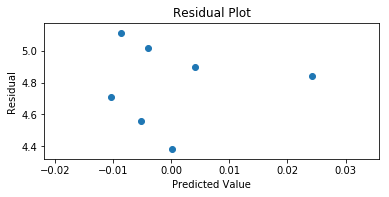

In [7]:

from matplotlib import pyplot as plt 
model_fitted_y=results.fittedvalues
#model_residuals=results.resid
true_val=log_val["Output"]
residuals=true_val-model_fitted_y
fig, ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(residuals,model_fitted_y)
plt.title('Residual Plot')
plt.xlabel("Predicted Value")
plt.ylabel("Residual")


In the figure above, it is hard to make a justification as we have very little data and therefore we cannot be certain that the residuals are normally distributed.

### f)

The $R_{adj}^2$ can be calculated by the formula $$R_{adj}^2=1-\frac{n-1}{n-k}(1-R^2)$$ where $$n=number\:of\:observations$$ $$k=number\:of\:independent\:variables$$ $$R^2= coefficient \:of \:determination$$
<br> We can also use the package results to calculate the $R_{adj}^2$ as shown in the code below:

In [8]:
#calculate the adj R^2 using the package
results.rsquared_adj

0.996876341819805

The above result ($R_{adj}^2=0.996876341819805$) indicates a near perfect fit, hovever this may be due to the low number of observations.